In [29]:
import random
import json
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoardDisplay as gbd

from scipy import stats


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mplTicker
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [30]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
# strategies = [Strategies.RandomStrategy,
#               Strategies.MoveFirstStrategy,
#               Strategies.MoveLastStrategy]
strategies = [Strategies.MoveFirstStrategy]
p0 = Player(0,7,mls)
p1 = Player(1, 7, mfs)
p2 = Player(2, 7, rs)
# p3 = Player(3, 4, rs)
md2 = Dice.MultiD2Dice(4)
d4 = Dice.D4()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs0 = GameSettings([p0, p1], md2, 4, 8, 2, [8], [4, 8, 13])
gs1 = GameSettings([p1, p2], md2, 4, 8, 2, [8], [4, 8, 13])
# gs = [gs0,gs1]

    
# gs = [GameSettings([Player(0, 7, s0()), Player(1, 7, s1())],
#                    Dice.MultiD2Dice(4), 14, 0, 0, [], []) for s1 in strategies for s0 in strategies]


# gs = [GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 14, 0, 0, [], []),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [], []),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [8], [4,8,13]),
# ]

# gs = [GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [8], [4,8,13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(3), 4, 8, 2, [8], [4, 8, 13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2DiceNo0(3), 4, 8, 2, [8], [4, 8, 13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.D4(), 4, 8, 2, [8], [4, 8, 13]),
# ]


gs = [
      GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(3), 4, 8, 2, [8], [4, 8, 13]),
      GameSettings([Player(0, 7, Strategies.ScoreStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(3), 4, 8, 2, [8], [4, 8, 13]),
      GameSettings([Player(0, 7, Strategies.ScoreStrategy()), Player(1, 7, Strategies.ScoreStrategy())], Dice.MultiD2Dice(3), 4, 8, 2, [8], [4, 8, 13]),
]

In [31]:
g = GameUr(gs[0])
g.getStonesHistory()
g.run(500)
# with open('history.json',"w") as f:
#     json.dump(g.getStonesHistory(),f)

In [43]:
h=[Multirun.multirun(10000,gs_) for gs_ in gs]

6
1667
10002
start pool
finish pool
6
1667
10002
start pool
finish pool
6
1667
10002
start pool
finish pool


In [33]:

gl = [[x["gameLength"] for x in h_] for h_ in h]
gl

[[54,
  57,
  55,
  58,
  61,
  64,
  64,
  61,
  65,
  60,
  58,
  55,
  65,
  59,
  60,
  70,
  67,
  64,
  62,
  56,
  69,
  59,
  65,
  63,
  67,
  55,
  63,
  64,
  64,
  58,
  58,
  59,
  58,
  63,
  56,
  55,
  54,
  63,
  74,
  58,
  75,
  77,
  60,
  60,
  70,
  60,
  64,
  63,
  53,
  63,
  55,
  71,
  65,
  70,
  55,
  67,
  72,
  64,
  67,
  69,
  51,
  67,
  58,
  50,
  56,
  68,
  62,
  78,
  70,
  66,
  59,
  67,
  64,
  73,
  54,
  65,
  57,
  62,
  62,
  64,
  67,
  70,
  62,
  61,
  61,
  66,
  70,
  67,
  63,
  68,
  65,
  70,
  65,
  63,
  74,
  65,
  59,
  61,
  70,
  66,
  68,
  74,
  68,
  55,
  72,
  61,
  56,
  67,
  57,
  64,
  66,
  58,
  73,
  58,
  54,
  62,
  59,
  61,
  70,
  59,
  53,
  65,
  53,
  53,
  65,
  66,
  76,
  59,
  65,
  62,
  56,
  59,
  67,
  63,
  59,
  59,
  59,
  58,
  74,
  72,
  64,
  57,
  69,
  68,
  66,
  57,
  55,
  63,
  58,
  62,
  60,
  65,
  51,
  64,
  64,
  68,
  58,
  65,
  56,
  71,
  73,
  60,
  69,
  59,
  56,
  58,
  71

In [34]:
gl = [[x["gameLength"] for x in h_] for h_ in h]
gl_stacked = [[(i,gl_.count(i)) for i in range(np.min(gl_),np.max(gl_)+1)] for gl_ in gl]

gl_stacked
# np.average(gl)
# np.min(gl)
# np.max(gl)


[[(48, 1),
  (49, 3),
  (50, 4),
  (51, 10),
  (52, 16),
  (53, 22),
  (54, 33),
  (55, 41),
  (56, 32),
  (57, 53),
  (58, 64),
  (59, 63),
  (60, 67),
  (61, 77),
  (62, 61),
  (63, 58),
  (64, 66),
  (65, 55),
  (66, 49),
  (67, 41),
  (68, 37),
  (69, 34),
  (70, 25),
  (71, 27),
  (72, 18),
  (73, 11),
  (74, 12),
  (75, 5),
  (76, 7),
  (77, 3),
  (78, 4),
  (79, 1),
  (80, 1),
  (81, 0),
  (82, 0),
  (83, 0),
  (84, 1)],
 [(45, 1),
  (46, 0),
  (47, 2),
  (48, 1),
  (49, 6),
  (50, 0),
  (51, 7),
  (52, 13),
  (53, 15),
  (54, 15),
  (55, 24),
  (56, 40),
  (57, 41),
  (58, 55),
  (59, 57),
  (60, 54),
  (61, 57),
  (62, 59),
  (63, 58),
  (64, 47),
  (65, 59),
  (66, 58),
  (67, 60),
  (68, 45),
  (69, 31),
  (70, 39),
  (71, 22),
  (72, 23),
  (73, 23),
  (74, 15),
  (75, 14),
  (76, 15),
  (77, 15),
  (78, 8),
  (79, 4),
  (80, 2),
  (81, 7),
  (82, 4),
  (83, 3),
  (84, 0),
  (85, 1),
  (86, 0),
  (87, 1),
  (88, 0),
  (89, 0),
  (90, 0),
  (91, 0),
  (92, 0),
  (93, 0),
  (

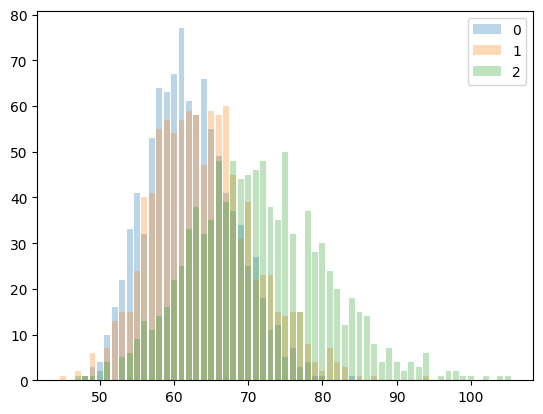

In [35]:
for i,gl_stacked_ in enumerate(gl_stacked):
        plt.bar([x for x, _ in gl_stacked_], [
                y for _, y in gl_stacked_], alpha=0.3, label=i)
plt.legend()

In [36]:
[{"strats":[s.getName() for s in gs[i].getStrategies()],"min":np.min(gl_),"median":np.median(gl_),"avg":np.average(gl_),"max":np.max(gl_)} for i,gl_ in enumerate(gl)]

[{'strats': ['MoveFirst', 'MoveFirst'],
  'min': 48,
  'median': 62.0,
  'avg': 62.199600798403196,
  'max': 84},
 {'strats': ['Score', 'MoveFirst'],
  'min': 45,
  'median': 63.0,
  'avg': 63.952095808383234,
  'max': 94},
 {'strats': ['Score', 'Score'],
  'min': 47,
  'median': 71.0,
  'avg': 71.25149700598803,
  'max': 105}]

In [37]:

interestingGames= [{"min": gl_.index(np.min(gl_)),
#  "median": gl_.index( np.median(gl_)), 
 "max": gl_.index(np.max(gl_))} for gl_ in gl]
interestingGames


[{'min': 882, 'max': 563}, {'min': 121, 'max': 773}, {'min': 40, 'max': 834}]

In [38]:

def drawGame(currGame, singleGraph=False):
    stepWidth = 0.2
    stepLineOcc = 0.1

    roundsLabels = [currGame["history"]["roundID"][i] if nR else ""  for i,nR in enumerate(currGame["history"]["newRound"])]

    playerProgress = {p: [np.sum([currGame["history"]["stones"][p][stone][step]for stone in currGame["history"]["stones"][p]])/(15*7)
         for step in currGame["history"]["globalStepID"]]for p in currGame["history"]["stones"]}

    graphcount = len(currGame["history"]["stones"])+2 if not singleGraph else 3
    stepcount = np.max(currGame["history"]["globalStepID"])
    height_ratios = [3]*(graphcount-2)+[1,1]

    fig, ax = plt.subplots(nrows=graphcount, sharex=True, figsize=[
        stepWidth*stepcount, 3*graphcount], gridspec_kw={'height_ratios': height_ratios})
    fig.subplots_adjust(hspace=0)


    for a in ax[:-2]:
        
        gbd.makeGameboardDisplay( a,
            *list(currGame["gameSettings"].getFieldsSettings().values()), xoff=2)
        a.set_yticks(range(0, 16), ["start"]+list(range(1, 15))+["end"])
        for drf in currGame["gameSettings"].getDoubleRollFields():
            a.axhline(drf, color=(0, 0, 0, 0.3),  ls='--')

    for a in ax:
        for i, ap in enumerate(currGame["history"]["activePlayer"]):
            if ap == "p0":
                facecolor = '#ff0000'
            elif ap == "p1":
                facecolor = '#0000ff'
            else:
                continue
            a.axvspan(i-0.5, i+0.5, facecolor=facecolor, alpha=stepLineOcc)

    ax[0].set_xlabel('step')
    secax = ax[0].secondary_xaxis('top')
    secax.set_xlabel('round')
    secax.set_xticks(currGame["history"]["globalStepID"], roundsLabels,
                        color=(0.1, 0.1, 0.1, 0.8))




    # norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
    stonecount=7
    my_colors = [np.array([np.linspace(.5, 1, stonecount), np.linspace(0, 0, stonecount),
                           np.linspace(0, 0.3, stonecount), np.linspace(0.8, .8, stonecount)]).reshape(4, -1).T,
                 np.array([np.linspace(0, 0, stonecount), np.linspace(0.5, 1, stonecount),
                           np.linspace(0, 0.3, stonecount), np.linspace(0.8, .8, stonecount)]).reshape(4, -1).T]
    
    for i, p in enumerate(currGame["history"]["stones"]):
        playerStones = currGame["history"]["stones"][p]
        for j,s in enumerate(playerStones):
            if singleGraph:
                axesID = 0
            else:
                axesID = i
            ax[axesID].plot(currGame["history"]["globalStepID"],
                    playerStones[s], marker='.', label=s, color=my_colors[i][j])
    
    for p in playerProgress:
        ax[-2].plot(currGame["history"]["globalStepID"], playerProgress[p], label=p)
    ax[-1].bar(currGame["history"]["globalStepID"],
            currGame["history"]["diceRoll"],alpha=0.5, label="diceRoll")
    ax[-1].bar(currGame["history"]["globalStepID"],
               currGame["history"]["moveDist"], alpha=0.5, label="moveDist")


    for a in ax[:-2]:
        a.axis('equal')
        a.set_xbound(-1, 16)
        a.legend(bbox_to_anchor=(1, 1),
                 loc='upper left', borderaxespad=0.)
    for a in ax:
        # a.grid("y")
        a.set_xbound(-4, stepcount+1)

    ax[-1].set_ybound(0,5)
    ax[-1].set_ylim(0,5)
    ax[-1].legend(bbox_to_anchor=(1, 1),
                  loc='upper left', borderaxespad=0.)
    ax[-2].legend(title=" Spielfortschritt",bbox_to_anchor=(1, 1),
                  loc='upper left', borderaxespad=0.)

    divider = make_axes_locatable(ax[-1])
    # axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax[-1])
    # axHisty.hist(currGame["history"]["diceRoll"],orientation='horizontal')
    # axHisty.hist(currGame["history"]["moveDist"],orientation='horizontal')
    # currGame["history"]["roundID"]
    # fig.tight_layout()



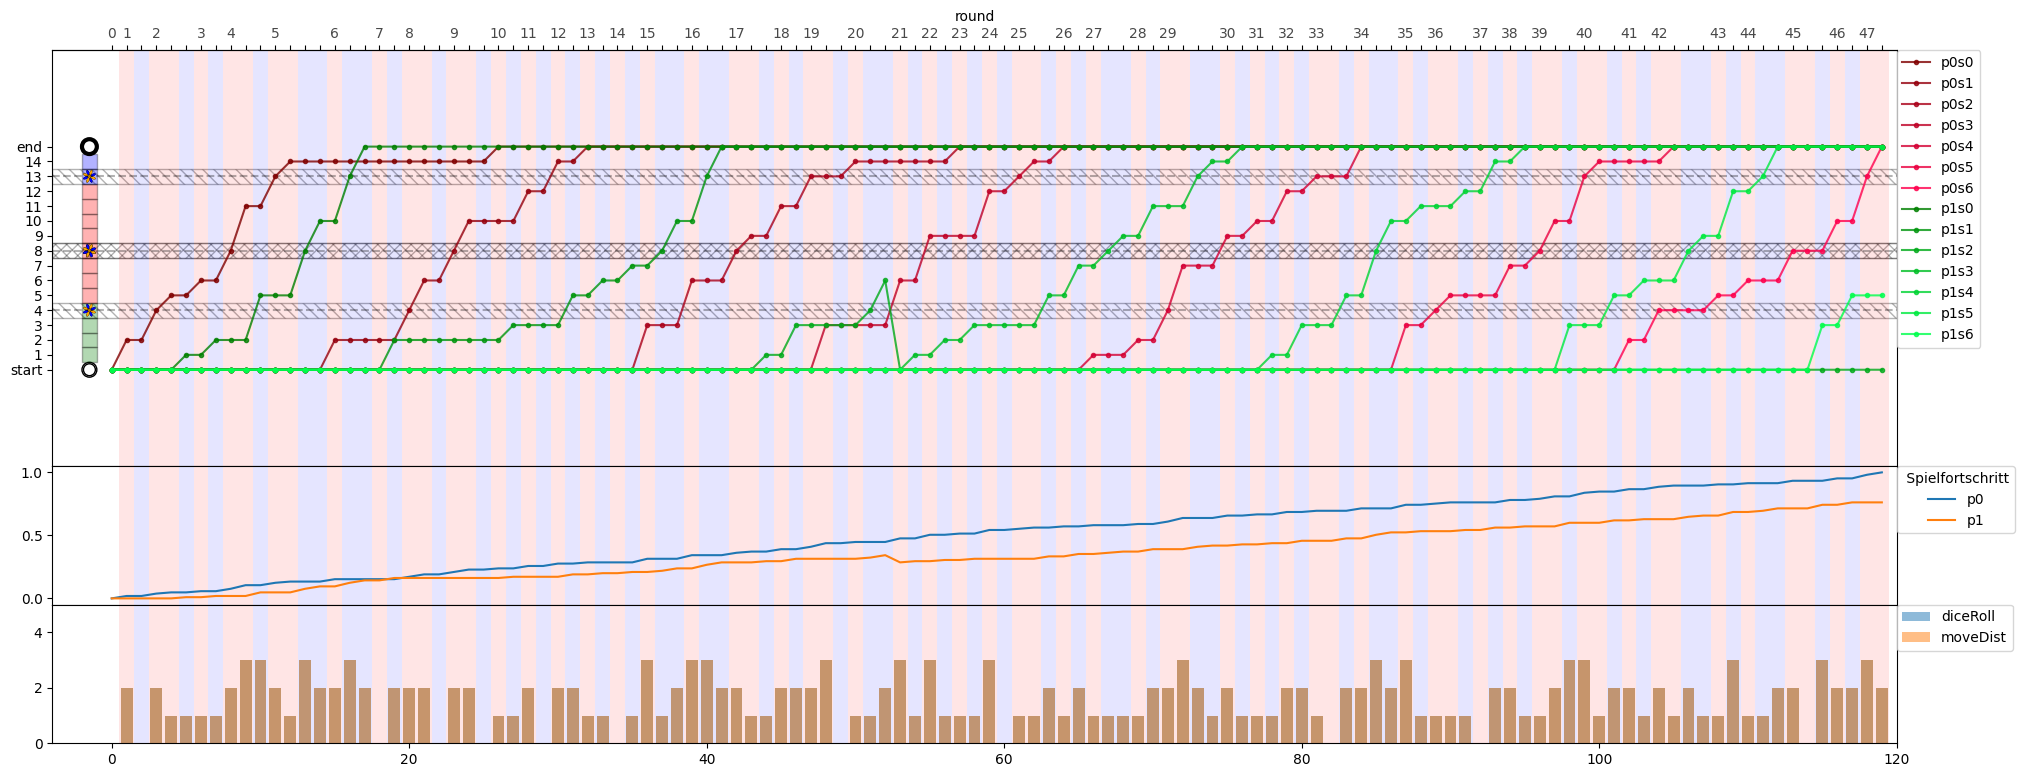

In [39]:
lengthCase = "min"
historyID = 0
currGame = h[historyID][interestingGames[historyID][lengthCase]]
drawGame(currGame, True)

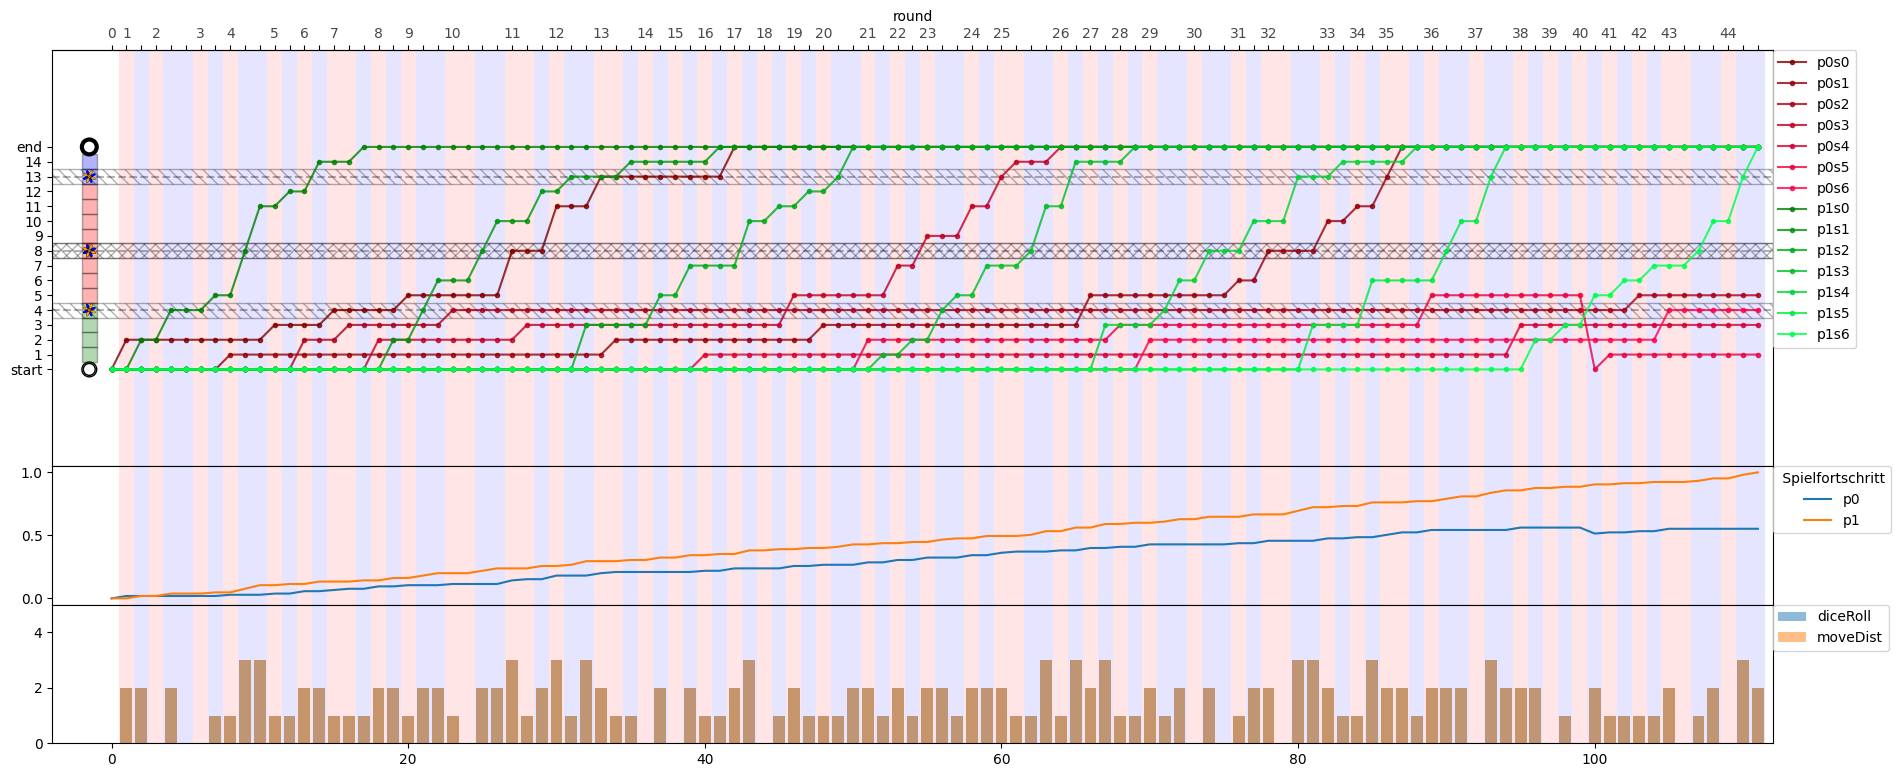

In [40]:
historyID = 1
currGame = h[historyID][interestingGames[historyID][lengthCase]]
drawGame(currGame, True)


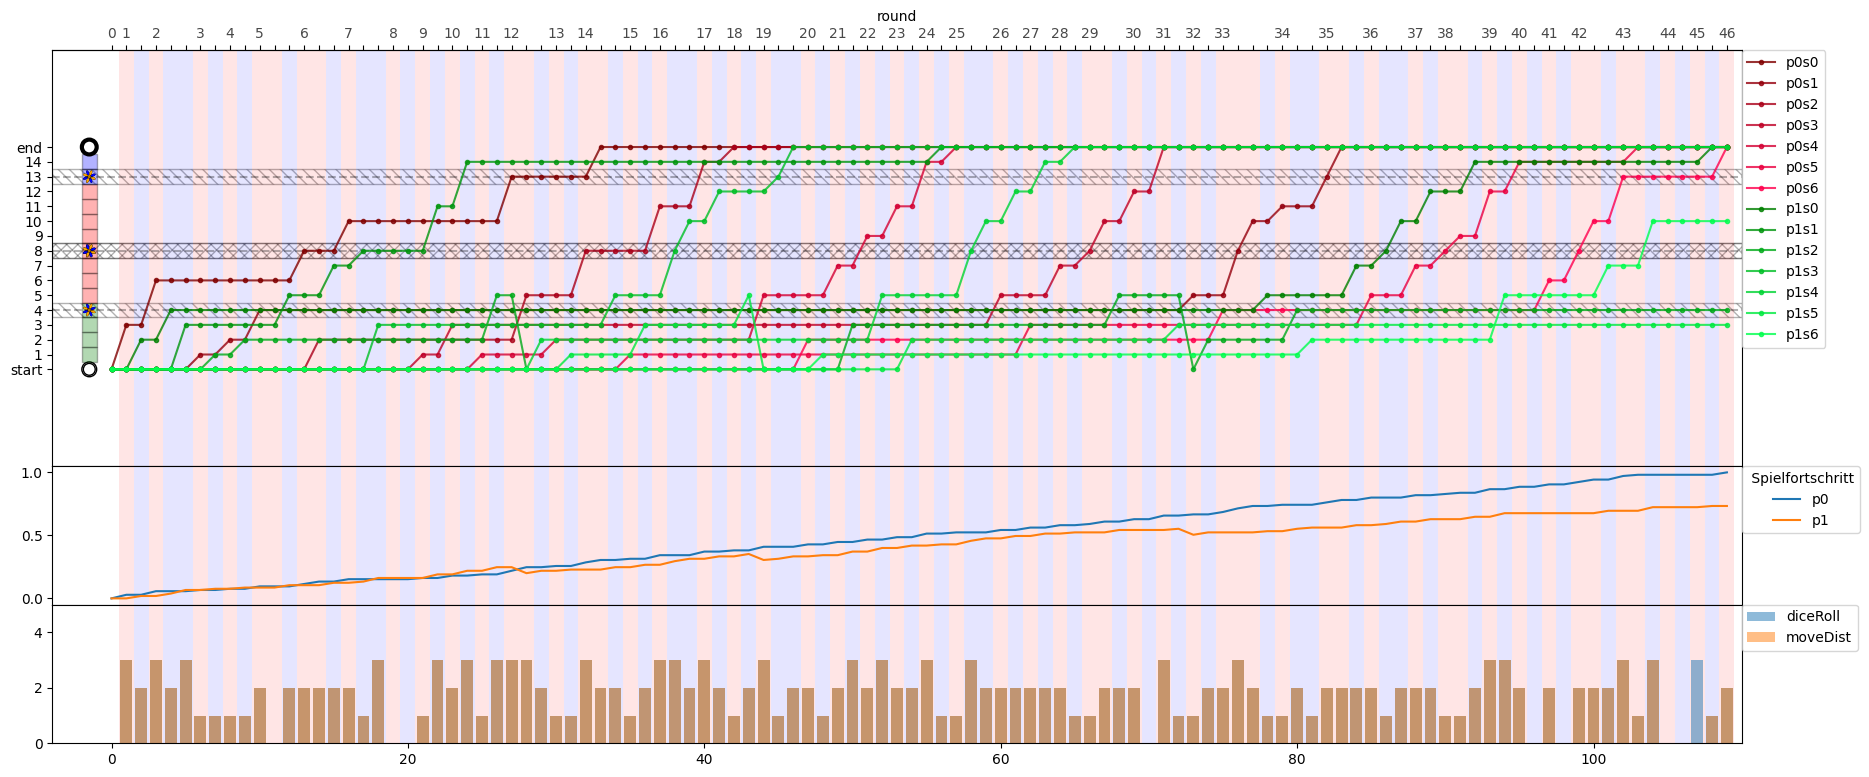

In [41]:
historyID = 2
currGame = h[historyID][interestingGames[historyID][lengthCase]]
drawGame(currGame, True)
